## Explore tumor purity data

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import mpmp.config as cfg
import mpmp.utilities.data_utilities as du

In [2]:
purity_df = pd.read_csv(cfg.tumor_purity_data, sep='\t', index_col=0)
purity_df.head()

,sample,call status,purity,ploidy,Genome doublings,Coverage for 80% power,Cancer DNA fraction,Subclonal genome fraction,solution
array,,,,,,,,,
TCGA-OR-A5J1-01,TCGA-OR-A5J1-01A-11D-A29H-01,called,0.90,2.00,0.0,9.0,0.90,0.02,new
TCGA-OR-A5J2-01,TCGA-OR-A5J2-01A-11D-A29H-01,called,0.89,1.30,0.0,6.0,0.84,0.16,new
TCGA-OR-A5J3-01,TCGA-OR-A5J3-01A-11D-A29H-01,called,0.93,1.27,0.0,5.0,0.89,0.11,new
TCGA-OR-A5J4-01,TCGA-OR-A5J4-01A-11D-A29H-01,called,0.87,2.60,1.0,12.0,0.89,0.08,new
TCGA-OR-A5J5-01,TCGA-OR-A5J5-01A-11D-A29H-01,called,0.93,2.79,1.0,12.0,0.95,0.15,new


Text(0.5, 0, 'Tumor purity')

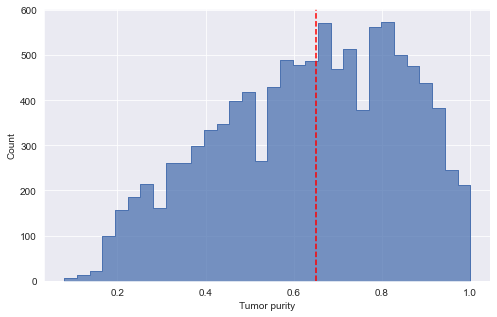

In [3]:
# visualize distribution of tumor purity values
sns.set({'figure.figsize': (8, 5)})
sns.histplot(purity_df, x='purity', element='step')
plt.gca().axvline(x=purity_df.purity.median(), linestyle='--', color='red')
plt.xlabel('Tumor purity')

The median tumor purity value seems to be a bit higher than 0.5 (this is probably due to filtering in some cancer types for high purity samples).

This should be reasonable enough to start with for classification, although I don't think it's the best way to do predictive modeling of this data. Really, we should just do regression, but we could also explore other binarization methods, or binarizing by cancer type.

In [4]:
# visualize distribution of tumor purity values, by cancer type
sample_info_df = du.load_sample_info('expression')
sample_info_df.head()

,sample_type,cancer_type,id_for_stratification
sample_id,,,
TCGA-02-0047-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor
TCGA-02-0055-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor
TCGA-02-2483-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor
TCGA-02-2485-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor
TCGA-02-2486-01,Primary Solid Tumor,GBM,GBMPrimary Solid Tumor


In [5]:
purity_cancer_df = (purity_df[['purity']]
    .merge(sample_info_df, left_index=True, right_index=True)
    .drop(columns=['id_for_stratification'])
)
purity_cancer_df.head()

,purity,sample_type,cancer_type
TCGA-OR-A5J1-01,0.90,Primary Solid Tumor,ACC
TCGA-OR-A5J2-01,0.89,Primary Solid Tumor,ACC
TCGA-OR-A5J3-01,0.93,Primary Solid Tumor,ACC
TCGA-OR-A5J5-01,0.93,Primary Solid Tumor,ACC
TCGA-OR-A5J6-01,0.69,Primary Solid Tumor,ACC


Text(0.5, 0, 'Tumor purity')

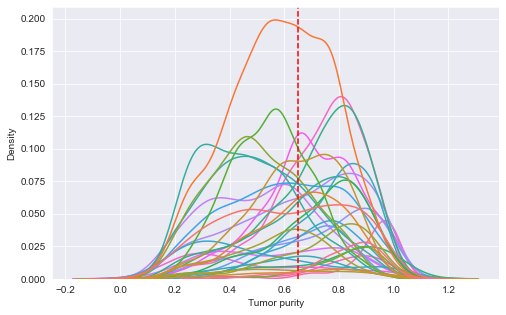

In [6]:
sns.set({'figure.figsize': (8, 5)})

g = sns.kdeplot(data=purity_cancer_df, x='purity', hue='cancer_type', legend=False)
# TODO: figure out legend
# g.fig.legend(labels=[], ncol=2)
plt.gca().axvline(x=purity_df.purity.median(), linestyle='--', color='red')
plt.xlabel('Tumor purity')

When we facet by cancer type, we can see that quite a few cancers have a peak closer to 0.8/0.9, probably due to filtering for high-purity samples. Others have many more low-purity samples (e.g. [pancreatic cancer](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga/studied-cancers/pancreatic)), and some are roughly centered around 0.5.

In the future, we could look further into these differences between cancer types, depending on the results of the prediction experiments.